# Modelagem dos dados

In [1]:
import math
import keras
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from sklearn import preprocessing

Using TensorFlow backend.


### Leitura dos dados

In [2]:
df = pd.read_csv("./../winequality.csv", sep=";")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Vejamos os tipos de dados de cada coluna

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   object 
 12  quality               6497 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 660.0+ KB


### TRATAMENTO DO BANCO DE DADOS

Se observado os dados type e alcohol são objects, precisamos só trabalhar com números.

* type: object (vamos mudar para inteiro)
* alcohol: object (vamos mudar para float e eliminar dados incosistentes)

In [4]:
#adicionar números como representantes das categorias
df['type'] = df['type'].map( {'White': 1, 'Red': 0} ).astype(int)
#vamos corrigir os erros da coluna, e substituí-los para NaN, em seguida preencher essas lacunas com a moda
#poderiamos ignorá-los, mas cada dado é valioso e vamos investigar usando essas dados corrompidos
df['alcohol'] = pd.to_numeric(df['alcohol'], errors='coerce')
freq_port = df.alcohol.dropna().mode()[0]
df['alcohol'] = df['alcohol'].fillna(freq_port)

### Agora os dados são apenas números!!!

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [6]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Para começar a análise, vamos ver como a distribuição dos dados se dá

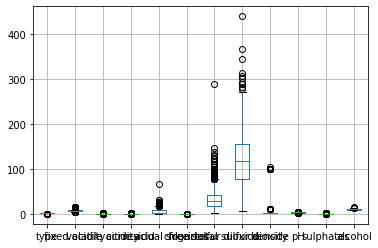

In [7]:
df.boxplot(column=list(df.columns[:-1]))

### Esse é um caso interessante, vamos adicionar um atributo relacionado a proporção de dioxide, adicionado como joy example para mostrar que algumas derivações de atributos foram avaliadas. Foi percebido essa possibilidade no final da análise, porém o melhor momento de adicionar é antes da normalização.

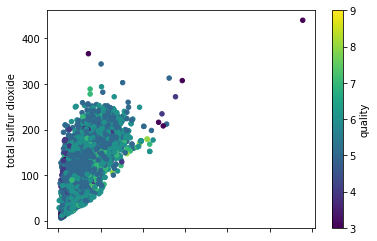

In [8]:
# Adiciono uma nova variável com a proporção de dioxide
df['prop dioxide'] = df['free sulfur dioxide']/df['total sulfur dioxide']

ax2 = df.plot.scatter(x='free sulfur dioxide',
                      y='total sulfur dioxide',
                      c='quality',
                      colormap='viridis')

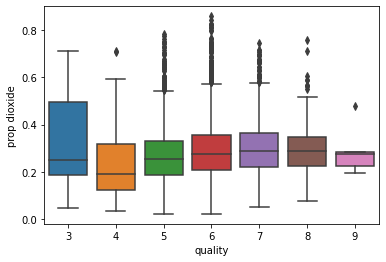

In [9]:
ax3 = sns.boxplot(x="quality", y="prop dioxide", data=df)

### Percebe-se que alguns atributos tem valores discrepantes, para melhorar essa visualização e não enviesar nossos modelos (alguns podem ser enviesados por essa discrepâcia de valores), vamos normalizar esses dados.

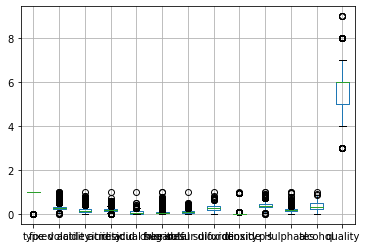

In [10]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled, columns=df.columns)
df_normalized['quality'] = df['quality']
df = df_normalized

df.boxplot(column=list(df.columns[:-1]))

### Como podem ver, alguns atributos tem outliers, vamos remove-los.

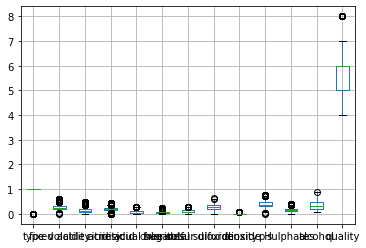

In [11]:
#REMOVER OUTLIERS
z_scores = stats.zscore(df) #calculate z-scores of `df` média 0 desvio padrão 1
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_without_outliers = df[filtered_entries]

df_without_outliers.boxplot(column=list(df.columns[:-1]))

In [12]:
df_without_outliers[['quality', 'type']].groupby(['quality'], as_index=False).mean().sort_values(by='quality', ascending=False)

,quality,type
4,8,0.939560
3,7,0.856299
2,6,0.816248
1,5,0.720352
0,4,0.836957


### Ao remover os outliers, percebemos que os dados de qualidade 3 e 9 são removidos, então eles são relevantes e devem permanecer junto com os dados.

### Agora vamos ver como o atributo quality está distribuido na coluna type novamente, mas com outra perspectiva.

In [13]:
df[['quality', 'type']].groupby(['quality'], as_index=False).mean().sort_values(by='quality', ascending=False)

,quality,type
6,9,1.000000
5,8,0.906736
4,7,0.815570
3,6,0.775035
2,5,0.681478
1,4,0.754630
0,3,0.666667


### Atributo type parece mostrar que a incidência de vinhos de qualidade maior estão mais presentes no vinho branco. Isso se deve também a quantidade de vinhos Brancos que são sua maioria.

### Vamos interpretar atributo por atributo.

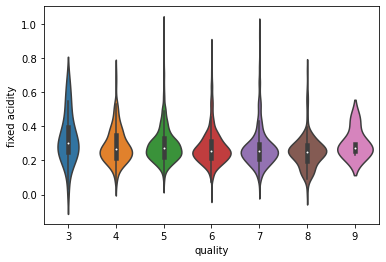

In [14]:
ax = sns.violinplot(x="quality", y="fixed acidity", data=df)

### Esse atributo não parece ser muito descritivo porém, para os casos de qualidade 3 e 9, eles se dirvegem com uma barriga maior (maior frequência dos dados) nos vinhos de alta qualidade.

### Vamos ao próximo atributo.

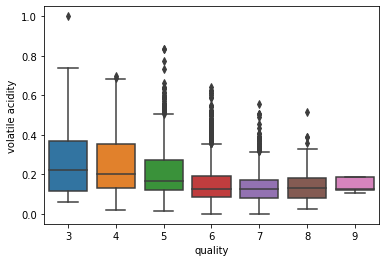

In [15]:
ax = sns.boxplot(x="quality", y="volatile acidity", data=df)

### Esse atributo já mostrou uma variedada correlacionada a qualidade, apesar de pouca.

### Interessante atributo, correlação decrescente

### Vamos ao próximo:

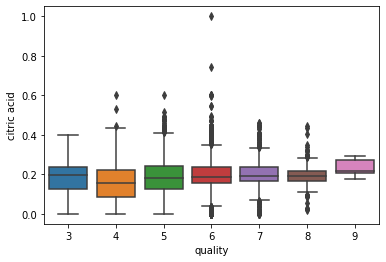

In [16]:
ax = sns.boxplot(x="quality", y="citric acid", data=df)

### Isoladamente não parece um bom atributo, mas podemos ver quando ele se combina com outro, sempre que isso ocorre, separamos esses casos para aumentar ou diminuir a dimensionalidade e verificar correlações, por enquanto mantemos.

### Segue o residual sugar

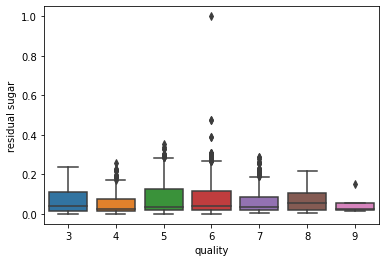

In [17]:
ax = sns.boxplot(x="quality", y="residual sugar", data=df)

### Mesma situação do anterior citric acid

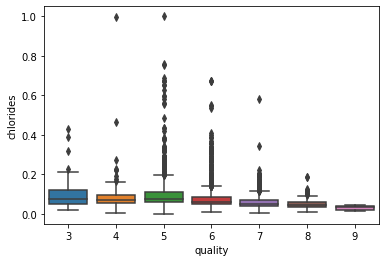

In [18]:
ax = sns.boxplot(x="quality", y="chlorides", data=df)

### Sutilmente os vinhos com mais qualidade estão em um intervalo mais curto

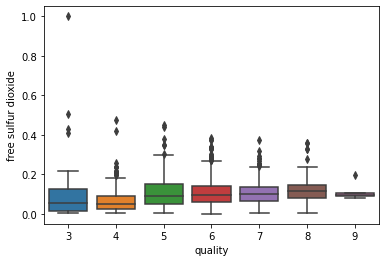

In [19]:
ax = sns.boxplot(x="quality", y="free sulfur dioxide", data=df)

### Sutil correlação decrescente e estreitamento do intervalo em vinhos com mais qualidade.

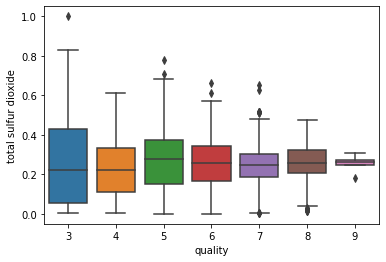

In [20]:
ax = sns.boxplot(x="quality", y="total sulfur dioxide", data=df)

### Algumas características só aparecem em vinhos com qualidade inferior, o intervalo fica mais concentrados a medida que a qualidade aumenta.

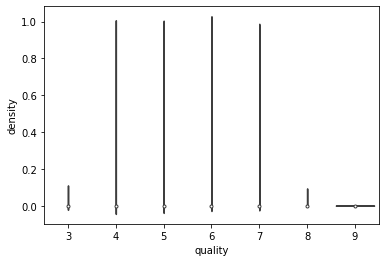

In [21]:
ax = sns.violinplot(x="quality", y="density", data=df)

### Variação inconsistente, os valores aparecem sem seguir crescente estável, nesses casos vamos categorizar por alguns intervalos.

In [22]:
# vamos categorizar, agrupar alguns intervalos
df.loc[ df['density'] <= 0.2, 'density'] = 0
df.loc[(df['density'] > 0.2) & (df['density'] <= 0.6), 'density'] = 0.5
df.loc[ df['density'] > 0.6, 'density'] = 1
df['density'] = df['density'].astype(int)
df[['quality', 'density']].groupby(['quality'], as_index=False).mean().sort_values(by='quality', ascending=False)

,quality,density
6,9,0.000000
5,8,0.000000
4,7,0.002780
3,6,0.005289
2,5,0.008887
1,4,0.004630
0,3,0.000000


### Vinhos com densidade maior são representados com pior qualidade, com algumas exceções, inclusivo para os vinhos de pior qualidade, o que dificulta na discriminação da amostra.

### Vamos a próxima característica:

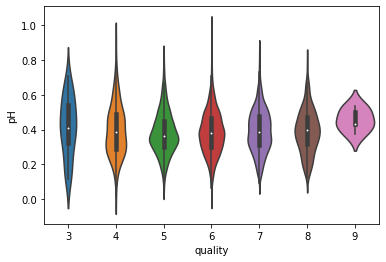

In [23]:
ax = sns.violinplot(x="quality", y="pH", data=df)

### Quanto maior a qualidade, mais restrito são os valores aceitáveis de ph do vinho

### Vamos a próxima característica:

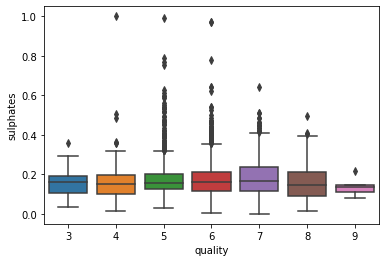

In [24]:
ax = sns.boxplot(x="quality", y="sulphates", data=df)

### Não parece ser um bom atributo, porém delimita subconjuntos simples (3 e 9), (7 e 8) e (4, 5 e 6)

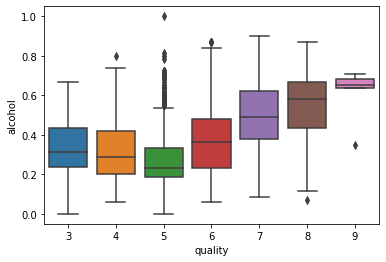

In [25]:
ax = sns.boxplot(x="quality", y="alcohol", data=df)

### Ótimo atributo, mostra-se bom representante para bons vinhos

### Agora vamos separar os atributos ruins e intercala-los com outros atributos para ver se encontra algum padrão para representar bons vinhos:

### Vamos começar com 

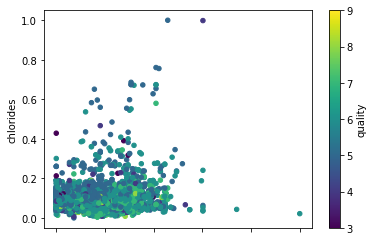

In [26]:
ax2 = df.plot.scatter(x='citric acid',
                      y='chlorides',
                      c='quality',
                      colormap='viridis')

### Isoladamente não parece um bom preditor, mas quando combinado com chlorides, parece ter algum potencial, ver-se que os melhores qualificados vinhos estão na parte inferior do gráfico, apesar de sutil.

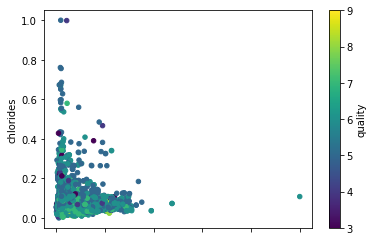

In [27]:
ax2 = df.plot.scatter(x='residual sugar',
                      y='chlorides',
                      c='quality',
                      colormap='viridis')

### Isoladamente não parece um bom preditor, mas quando combinado com chlorides, um sutil correlação acontece. Quanto mais distante da região inferior esquerda, menor a qualidade do vinho.

### Assim, pelo que foi analisado, vamos manter todos os atributos com o acréscimo de mais um.

# Machine Learning

In [28]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

### Vamos selecionar nossas técnicas

In [29]:
machine_learning_techniques = []
machine_learning_techniques.append(SVC())
machine_learning_techniques.append(LinearSVC())
machine_learning_techniques.append(RandomForestClassifier())
machine_learning_techniques.append(KNeighborsClassifier())
machine_learning_techniques.append(GaussianNB())
machine_learning_techniques.append(Perceptron())
machine_learning_techniques.append(SGDClassifier())
machine_learning_techniques.append(DecisionTreeClassifier())
machine_learning_techniques.append(MultinomialNB())

### Embaralhar nossa amostra

In [30]:
df = df.sample(frac=1).reset_index(drop=True)

### Treinar e avaliar nossos modelos

In [31]:
for tech in machine_learning_techniques:

    # cross 10-fold validation
    interval = int(len(df)/10)
    total_acc = []
    total_rmse = []
    for i in range(0, len(df)-interval, interval):

        test_df = df.loc[i:i+interval]
        if i+interval > len(df)-interval:
            test_df = df.loc[i:]

        train_df = df.drop(test_df.index)
        # Balanceamento não melhorou a predição dos modelos e por isso não foi utilizado, seguimos com a distribuição reais dos dados.
        # train_df = balancing(train_df)

        X_test = test_df.drop("quality", axis=1)
        Y_test = test_df["quality"]

        X_train = train_df.drop("quality", axis=1)
        Y_train = train_df["quality"]

        # treina
        tech.fit(X_train, Y_train)
        
        # predição e acc
        Y_pred = tech.predict(X_test)
        
        acc_tech = round(tech.score(X_test, Y_test) * 100, 2)
        mse = mean_squared_error(Y_test, Y_pred)
        # print(f'acc: {acc_tech} mse:{mse}')
        total_acc.append(acc_tech)
        total_rmse.append(mse)

    acc_mean = sum(total_acc)/len(total_acc)
    rmse_mean = sum(total_rmse)/len(total_rmse)
    print(f'acc: {round(acc_mean, 2)}% - rmse: {round(rmse_mean, 2)} {tech.__class__.__name__}')

acc: 54.4% - rmse: 0.63 SVC
acc: 53.44% - rmse: 0.66 LinearSVC
acc: 70.39% - rmse: 0.41 RandomForestClassifier
acc: 57.03% - rmse: 0.65 KNeighborsClassifier
acc: 2.32% - rmse: 6.5 GaussianNB
acc: 38.11% - rmse: 2.05 Perceptron
acc: 52.61% - rmse: 0.69 SGDClassifier
acc: 61.86% - rmse: 0.68 DecisionTreeClassifier
acc: 43.79% - rmse: 0.79 MultinomialNB


# Deep Learning

In [32]:
import keras
import keras.backend as K
import pandas as pd
import matplotlib.pyplot as plt

from keras.utils import np_utils

### Definição do modelo

In [33]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='elu', input_shape=(13,)),
    keras.layers.Dense(64, activation='elu'),
    keras.layers.Dense(32, activation='elu'),
    keras.layers.Dense(16, activation='elu'),
    keras.layers.Dense(7, activation='softmax')
])

### Criação de uma callback

In [34]:
from keras.callbacks import Callback

class TerminateTrainingLoss(Callback):

    """
    Termina o treino quando atinge determinada loss
    """

    def __init__(self, minimal_loss=0.2):
        self.minimal_loss = minimal_loss

    def on_epoch_end(self, epoch, logs=None, verbose=False):
        
        if logs.get('loss') < self.minimal_loss:
            self.model.stop_training = True

### Criação de uma loss function para observação

In [35]:
def RMSE(y_true, y_pred):
    # Um pouco diferente da abordagem do sklearn por que utiliza das probabilidades da softmax 
    # (não comparável até que se utilizem a mesma abordagem para avaliação)
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

adam = keras.optimizers.Adam(learning_rate=0.004)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['acc', RMSE])

### Preparação dos dados

In [36]:
df = df.sample(frac=1).reset_index(drop=True)
interval = int(len(df)/10)
print(f'interval: {interval}')

test_df = df.loc[:interval]
train_df = df.drop(test_df.index)
# Balanceamento não melhorou a predição dos modelos e por isso não foi utilizado, seguimos com a distribuição reais dos dados.
# train_df = balancing(train_df)

# Como parte do pré processamento vamos transformar o label em matriz identidade
# por isso vamos simplificar o valor desse resultado para um intervalo melhor aceitável
# entre 0 e 7 e não entre 3 e 9
X_test = test_df.drop("quality", axis=1)
Y_test = test_df["quality"]-3

X_train = train_df.drop("quality", axis=1)
Y_train = train_df["quality"]-3

print(np_utils.to_categorical(Y_test).shape)

interval: 649
(650, 6)


### Treino e avaliação do modelo

In [37]:
# callback
callback = TerminateTrainingLoss()

# treina
history = model.fit(X_train, 
                    np_utils.to_categorical(Y_train, num_classes=7), 
                    epochs=1000, 
                    callbacks=[callback],
                    verbose=1, 
                    batch_size=128, 
                    validation_split = 0.1)

# predição e acc e mse
_, acc_tech, _ = model.evaluate(X_test, 
                            np_utils.to_categorical(Y_test, num_classes=7), 
                            verbose=0)

print(f'\nDeep learning trouxe uma acurácia de {round(acc_tech,2)}\n')

Train on 5262 samples, validate on 585 samples
Epoch 1/1000
5262/5262 [==============================] - 0s 42us/step - loss: 1.2715 - acc: 0.4738 - RMSE: 0.3034 - val_loss: 1.2995 - val_acc: 0.4239 - val_RMSE: 0.3113
Epoch 2/1000
5262/5262 [==============================] - 0s 15us/step - loss: 1.1665 - acc: 0.5008 - RMSE: 0.2966 - val_loss: 1.0796 - val_acc: 0.5504 - val_RMSE: 0.2899
Epoch 3/1000
5262/5262 [==============================] - 0s 16us/step - loss: 1.0997 - acc: 0.5321 - RMSE: 0.2907 - val_loss: 1.1193 - val_acc: 0.5077 - val_RMSE: 0.2964
Epoch 4/1000
5262/5262 [==============================] - 0s 15us/step - loss: 1.1178 - acc: 0.5143 - RMSE: 0.2942 - val_loss: 1.0689 - val_acc: 0.5521 - val_RMSE: 0.2895
Epoch 5/1000
5262/5262 [==============================] - 0s 14us/step - loss: 1.0902 - acc: 0.5285 - RMSE: 0.2911 - val_loss: 1.0670 - val_acc: 0.5521 - val_RMSE: 0.2898
Epoch 6/1000
5262/5262 [==============================] - 0s 15us/step - loss: 1.0863 - acc: 0.533

5262/5262 [==============================] - 0s 14us/step - loss: 0.9891 - acc: 0.5703 - RMSE: 0.2815 - val_loss: 1.0393 - val_acc: 0.5470 - val_RMSE: 0.2875
Epoch 49/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.9988 - acc: 0.5677 - RMSE: 0.2819 - val_loss: 1.0714 - val_acc: 0.5590 - val_RMSE: 0.2911
Epoch 50/1000
5262/5262 [==============================] - 0s 13us/step - loss: 1.0149 - acc: 0.5639 - RMSE: 0.2831 - val_loss: 1.0519 - val_acc: 0.5521 - val_RMSE: 0.2893
Epoch 51/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.9932 - acc: 0.5724 - RMSE: 0.2822 - val_loss: 1.0413 - val_acc: 0.5692 - val_RMSE: 0.2871
Epoch 52/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.9909 - acc: 0.5741 - RMSE: 0.2806 - val_loss: 1.0568 - val_acc: 0.5573 - val_RMSE: 0.2897
Epoch 53/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.9871 - acc: 0.5661 - RMSE: 0.2809 - val_loss: 1.0818 - val_acc: 0.5009 -

Epoch 96/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.8974 - acc: 0.6062 - RMSE: 0.2701 - val_loss: 1.0815 - val_acc: 0.5521 - val_RMSE: 0.2898
Epoch 97/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.8820 - acc: 0.6169 - RMSE: 0.2674 - val_loss: 1.0733 - val_acc: 0.5265 - val_RMSE: 0.2919
Epoch 98/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.8782 - acc: 0.6154 - RMSE: 0.2674 - val_loss: 1.1109 - val_acc: 0.5504 - val_RMSE: 0.2921
Epoch 99/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.8842 - acc: 0.6114 - RMSE: 0.2683 - val_loss: 1.0769 - val_acc: 0.5385 - val_RMSE: 0.2902
Epoch 100/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.8923 - acc: 0.6089 - RMSE: 0.2680 - val_loss: 1.0943 - val_acc: 0.5316 - val_RMSE: 0.2919
Epoch 101/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.8799 - acc: 0.6125 - RMSE: 0.2676 - val_loss: 1.0775 - v

5262/5262 [==============================] - 0s 13us/step - loss: 0.7588 - acc: 0.6703 - RMSE: 0.2495 - val_loss: 1.1390 - val_acc: 0.5658 - val_RMSE: 0.2863
Epoch 144/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.7649 - acc: 0.6746 - RMSE: 0.2515 - val_loss: 1.1602 - val_acc: 0.5624 - val_RMSE: 0.2886
Epoch 145/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.7684 - acc: 0.6688 - RMSE: 0.2510 - val_loss: 1.1295 - val_acc: 0.5675 - val_RMSE: 0.2868
Epoch 146/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.7591 - acc: 0.6754 - RMSE: 0.2516 - val_loss: 1.1812 - val_acc: 0.5692 - val_RMSE: 0.2888
Epoch 147/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.7798 - acc: 0.6553 - RMSE: 0.2531 - val_loss: 1.1317 - val_acc: 0.5744 - val_RMSE: 0.2871
Epoch 148/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.7421 - acc: 0.6826 - RMSE: 0.2484 - val_loss: 1.1573 - val_acc: 0.5

5262/5262 [==============================] - 0s 14us/step - loss: 0.6488 - acc: 0.7235 - RMSE: 0.2309 - val_loss: 1.3189 - val_acc: 0.5897 - val_RMSE: 0.2875
Epoch 191/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.6692 - acc: 0.7130 - RMSE: 0.2347 - val_loss: 1.2473 - val_acc: 0.5709 - val_RMSE: 0.2852
Epoch 192/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.6447 - acc: 0.7281 - RMSE: 0.2300 - val_loss: 1.3181 - val_acc: 0.5692 - val_RMSE: 0.2894
Epoch 193/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.6287 - acc: 0.7328 - RMSE: 0.2288 - val_loss: 1.2813 - val_acc: 0.5658 - val_RMSE: 0.2858
Epoch 194/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.6418 - acc: 0.7328 - RMSE: 0.2294 - val_loss: 1.3108 - val_acc: 0.5761 - val_RMSE: 0.2886
Epoch 195/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.6873 - acc: 0.7130 - RMSE: 0.2359 - val_loss: 1.3259 - val_acc: 0.5

5262/5262 [==============================] - 0s 14us/step - loss: 0.5714 - acc: 0.7617 - RMSE: 0.2164 - val_loss: 1.5402 - val_acc: 0.5932 - val_RMSE: 0.2935
Epoch 238/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.5618 - acc: 0.7643 - RMSE: 0.2156 - val_loss: 1.5128 - val_acc: 0.5726 - val_RMSE: 0.2916
Epoch 239/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.5682 - acc: 0.7649 - RMSE: 0.2168 - val_loss: 1.5550 - val_acc: 0.5658 - val_RMSE: 0.2968
Epoch 240/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.6135 - acc: 0.7417 - RMSE: 0.2236 - val_loss: 1.5233 - val_acc: 0.5795 - val_RMSE: 0.2954
Epoch 241/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.5842 - acc: 0.7524 - RMSE: 0.2191 - val_loss: 1.5002 - val_acc: 0.5607 - val_RMSE: 0.2968
Epoch 242/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.5578 - acc: 0.7739 - RMSE: 0.2129 - val_loss: 1.5881 - val_acc: 0.5

5262/5262 [==============================] - 0s 14us/step - loss: 0.5121 - acc: 0.7885 - RMSE: 0.2058 - val_loss: 1.7446 - val_acc: 0.5744 - val_RMSE: 0.2980
Epoch 285/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.4885 - acc: 0.7997 - RMSE: 0.1997 - val_loss: 1.8095 - val_acc: 0.5607 - val_RMSE: 0.3041
Epoch 286/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.5007 - acc: 0.7930 - RMSE: 0.2020 - val_loss: 1.9046 - val_acc: 0.5675 - val_RMSE: 0.3039
Epoch 287/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.5221 - acc: 0.7841 - RMSE: 0.2081 - val_loss: 1.7846 - val_acc: 0.5761 - val_RMSE: 0.2985
Epoch 288/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.5652 - acc: 0.7566 - RMSE: 0.2145 - val_loss: 1.7503 - val_acc: 0.5795 - val_RMSE: 0.2967
Epoch 289/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.5015 - acc: 0.7940 - RMSE: 0.2022 - val_loss: 1.7545 - val_acc: 0.5

5262/5262 [==============================] - 0s 13us/step - loss: 0.4490 - acc: 0.8157 - RMSE: 0.1928 - val_loss: 2.0879 - val_acc: 0.5709 - val_RMSE: 0.3042
Epoch 332/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.4874 - acc: 0.7993 - RMSE: 0.1994 - val_loss: 1.9922 - val_acc: 0.5692 - val_RMSE: 0.3044
Epoch 333/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.4417 - acc: 0.8210 - RMSE: 0.1881 - val_loss: 2.0301 - val_acc: 0.5744 - val_RMSE: 0.3036
Epoch 334/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.4349 - acc: 0.8252 - RMSE: 0.1879 - val_loss: 2.0667 - val_acc: 0.5744 - val_RMSE: 0.3025
Epoch 335/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.4398 - acc: 0.8244 - RMSE: 0.1888 - val_loss: 2.0072 - val_acc: 0.5863 - val_RMSE: 0.2990
Epoch 336/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.4705 - acc: 0.8077 - RMSE: 0.1967 - val_loss: 2.0185 - val_acc: 0.5

5262/5262 [==============================] - 0s 14us/step - loss: 0.4090 - acc: 0.8406 - RMSE: 0.1816 - val_loss: 2.2484 - val_acc: 0.5761 - val_RMSE: 0.3049
Epoch 379/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.4084 - acc: 0.8400 - RMSE: 0.1805 - val_loss: 2.2210 - val_acc: 0.5795 - val_RMSE: 0.3054
Epoch 380/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.4178 - acc: 0.8301 - RMSE: 0.1840 - val_loss: 2.2322 - val_acc: 0.6000 - val_RMSE: 0.2989
Epoch 381/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.4304 - acc: 0.8242 - RMSE: 0.1887 - val_loss: 2.3066 - val_acc: 0.5692 - val_RMSE: 0.3057
Epoch 382/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.4533 - acc: 0.8179 - RMSE: 0.1917 - val_loss: 2.3013 - val_acc: 0.5812 - val_RMSE: 0.3089
Epoch 383/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.4587 - acc: 0.8128 - RMSE: 0.1929 - val_loss: 2.2576 - val_acc: 0.5

5262/5262 [==============================] - 0s 13us/step - loss: 0.4049 - acc: 0.8440 - RMSE: 0.1778 - val_loss: 2.3999 - val_acc: 0.5915 - val_RMSE: 0.2987
Epoch 426/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.4109 - acc: 0.8358 - RMSE: 0.1808 - val_loss: 2.4309 - val_acc: 0.5709 - val_RMSE: 0.3056
Epoch 427/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.3774 - acc: 0.8489 - RMSE: 0.1747 - val_loss: 2.4212 - val_acc: 0.5795 - val_RMSE: 0.3074
Epoch 428/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.3743 - acc: 0.8483 - RMSE: 0.1747 - val_loss: 2.4705 - val_acc: 0.5915 - val_RMSE: 0.3033
Epoch 429/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.3512 - acc: 0.8618 - RMSE: 0.1685 - val_loss: 2.4729 - val_acc: 0.5915 - val_RMSE: 0.3019
Epoch 430/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.4001 - acc: 0.8390 - RMSE: 0.1803 - val_loss: 2.4940 - val_acc: 0.5

5262/5262 [==============================] - 0s 14us/step - loss: 0.3891 - acc: 0.8461 - RMSE: 0.1775 - val_loss: 2.6036 - val_acc: 0.5846 - val_RMSE: 0.3035
Epoch 473/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.3513 - acc: 0.8607 - RMSE: 0.1686 - val_loss: 2.6493 - val_acc: 0.5709 - val_RMSE: 0.3096
Epoch 474/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.3469 - acc: 0.8645 - RMSE: 0.1678 - val_loss: 2.7338 - val_acc: 0.5624 - val_RMSE: 0.3100
Epoch 475/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.3702 - acc: 0.8483 - RMSE: 0.1738 - val_loss: 2.7477 - val_acc: 0.5607 - val_RMSE: 0.3125
Epoch 476/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.3689 - acc: 0.8548 - RMSE: 0.1718 - val_loss: 2.6744 - val_acc: 0.5880 - val_RMSE: 0.3047
Epoch 477/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.3608 - acc: 0.8571 - RMSE: 0.1709 - val_loss: 2.6014 - val_acc: 0.6

5262/5262 [==============================] - 0s 14us/step - loss: 0.4081 - acc: 0.8360 - RMSE: 0.1795 - val_loss: 2.7951 - val_acc: 0.5812 - val_RMSE: 0.3076
Epoch 520/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.4183 - acc: 0.8326 - RMSE: 0.1825 - val_loss: 2.8204 - val_acc: 0.5573 - val_RMSE: 0.3125
Epoch 521/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.4195 - acc: 0.8385 - RMSE: 0.1813 - val_loss: 2.7887 - val_acc: 0.5641 - val_RMSE: 0.3117
Epoch 522/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.4109 - acc: 0.8406 - RMSE: 0.1800 - val_loss: 2.8728 - val_acc: 0.5795 - val_RMSE: 0.3121
Epoch 523/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.3879 - acc: 0.8487 - RMSE: 0.1748 - val_loss: 2.8223 - val_acc: 0.5915 - val_RMSE: 0.3017
Epoch 524/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.3348 - acc: 0.8689 - RMSE: 0.1646 - val_loss: 2.8785 - val_acc: 0.5

5262/5262 [==============================] - 0s 13us/step - loss: 0.3588 - acc: 0.8620 - RMSE: 0.1677 - val_loss: 3.0331 - val_acc: 0.6000 - val_RMSE: 0.3034
Epoch 567/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.3268 - acc: 0.8687 - RMSE: 0.1608 - val_loss: 3.0705 - val_acc: 0.5744 - val_RMSE: 0.3121
Epoch 568/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.2886 - acc: 0.8877 - RMSE: 0.1509 - val_loss: 2.9900 - val_acc: 0.5675 - val_RMSE: 0.3122
Epoch 569/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.3352 - acc: 0.8740 - RMSE: 0.1611 - val_loss: 3.2034 - val_acc: 0.5846 - val_RMSE: 0.3066
Epoch 570/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.4260 - acc: 0.8426 - RMSE: 0.1798 - val_loss: 3.0233 - val_acc: 0.5829 - val_RMSE: 0.3127
Epoch 571/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.3699 - acc: 0.8565 - RMSE: 0.1692 - val_loss: 2.9639 - val_acc: 0.5

5262/5262 [==============================] - 0s 13us/step - loss: 0.3501 - acc: 0.8664 - RMSE: 0.1646 - val_loss: 3.4172 - val_acc: 0.5709 - val_RMSE: 0.3139
Epoch 614/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.3091 - acc: 0.8816 - RMSE: 0.1561 - val_loss: 3.2675 - val_acc: 0.5761 - val_RMSE: 0.3133
Epoch 615/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.3111 - acc: 0.8799 - RMSE: 0.1569 - val_loss: 3.2579 - val_acc: 0.5590 - val_RMSE: 0.3182
Epoch 616/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.3391 - acc: 0.8674 - RMSE: 0.1634 - val_loss: 3.2175 - val_acc: 0.5692 - val_RMSE: 0.3140
Epoch 617/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.2941 - acc: 0.8926 - RMSE: 0.1502 - val_loss: 3.3324 - val_acc: 0.5863 - val_RMSE: 0.3086
Epoch 618/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.2807 - acc: 0.8922 - RMSE: 0.1490 - val_loss: 3.2623 - val_acc: 0.5

5262/5262 [==============================] - 0s 14us/step - loss: 0.2649 - acc: 0.8993 - RMSE: 0.1424 - val_loss: 3.4745 - val_acc: 0.5812 - val_RMSE: 0.3132
Epoch 661/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.2654 - acc: 0.9025 - RMSE: 0.1458 - val_loss: 3.4950 - val_acc: 0.5726 - val_RMSE: 0.3188
Epoch 662/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.3257 - acc: 0.8713 - RMSE: 0.1619 - val_loss: 3.4516 - val_acc: 0.5812 - val_RMSE: 0.3138
Epoch 663/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.3890 - acc: 0.8544 - RMSE: 0.1708 - val_loss: 3.4175 - val_acc: 0.5607 - val_RMSE: 0.3198
Epoch 664/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.2942 - acc: 0.8852 - RMSE: 0.1531 - val_loss: 3.5588 - val_acc: 0.5744 - val_RMSE: 0.3181
Epoch 665/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.2592 - acc: 0.9002 - RMSE: 0.1437 - val_loss: 3.3499 - val_acc: 0.5

5262/5262 [==============================] - 0s 14us/step - loss: 0.2982 - acc: 0.8843 - RMSE: 0.1504 - val_loss: 3.6565 - val_acc: 0.5829 - val_RMSE: 0.3132
Epoch 708/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.2396 - acc: 0.9092 - RMSE: 0.1366 - val_loss: 3.6140 - val_acc: 0.5658 - val_RMSE: 0.3194
Epoch 709/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.2452 - acc: 0.9036 - RMSE: 0.1408 - val_loss: 3.8054 - val_acc: 0.5915 - val_RMSE: 0.3150
Epoch 710/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.2640 - acc: 0.8983 - RMSE: 0.1462 - val_loss: 3.6278 - val_acc: 0.5795 - val_RMSE: 0.3156
Epoch 711/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.4753 - acc: 0.8339 - RMSE: 0.1863 - val_loss: 3.3751 - val_acc: 0.5573 - val_RMSE: 0.3212
Epoch 712/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.4543 - acc: 0.8331 - RMSE: 0.1855 - val_loss: 3.5614 - val_acc: 0.5

5262/5262 [==============================] - 0s 14us/step - loss: 0.2504 - acc: 0.9052 - RMSE: 0.1411 - val_loss: 3.6875 - val_acc: 0.5915 - val_RMSE: 0.3165
Epoch 755/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.2299 - acc: 0.9130 - RMSE: 0.1338 - val_loss: 3.8168 - val_acc: 0.5932 - val_RMSE: 0.3142
Epoch 756/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.2126 - acc: 0.9175 - RMSE: 0.1275 - val_loss: 3.8302 - val_acc: 0.5812 - val_RMSE: 0.3186
Epoch 757/1000
5262/5262 [==============================] - 0s 15us/step - loss: 0.2035 - acc: 0.9227 - RMSE: 0.1274 - val_loss: 3.8657 - val_acc: 0.5846 - val_RMSE: 0.3145
Epoch 758/1000
5262/5262 [==============================] - 0s 13us/step - loss: 0.2560 - acc: 0.9033 - RMSE: 0.1422 - val_loss: 3.8750 - val_acc: 0.5624 - val_RMSE: 0.3176
Epoch 759/1000
5262/5262 [==============================] - 0s 14us/step - loss: 0.2565 - acc: 0.8993 - RMSE: 0.1413 - val_loss: 3.7788 - val_acc: 0.5

### Vamos plotar o histórico de treinamento

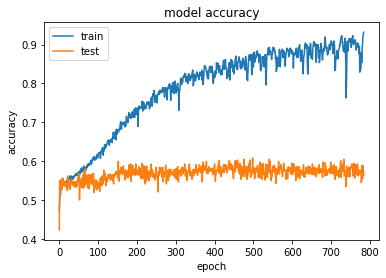

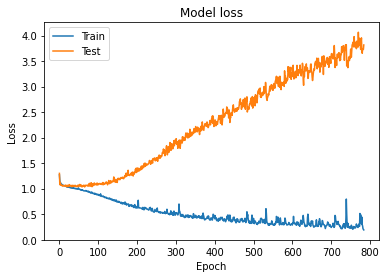

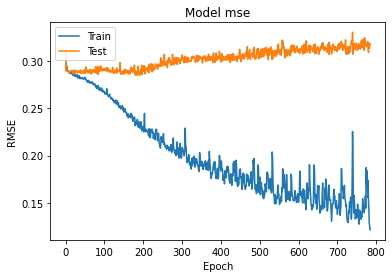

In [38]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation mse values
plt.plot(history.history['RMSE'])
plt.plot(history.history['val_RMSE'])
plt.title('Model mse')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()